In [1]:
import sys
sys.path.append('..')

In [2]:
from src.models.pipeline import pipeline
import glob
import json
import os
import pandas as pd
import ast
from datetime import datetime

In [3]:
groundbase_dir = '../data/raw/groundbase'
transcripts_dir = os.path.join(groundbase_dir,'transcripts')
topic_dataset_path = os.path.join(groundbase_dir,'dataset.csv')
transcript_filespath = glob.glob(groundbase_dir + '/transcripts/*.json')

In [4]:
'''Read the transcript'''
transcripts_jsons = {}
for fl in transcript_filespath:
    with open(fl,encoding="utf8") as f:
        transcript =ast.literal_eval(f.read()) #json.load(f)
        vid = fl.split('\\')[-1].split('.')[0]
        #print(vid)
        transcripts_jsons[vid] = transcript
#print(transcripts_jsons)

In [5]:
'''Read the videos metadata to perform on them the segmentation'''
df_videos = pd.read_csv(topic_dataset_path)

In [6]:
''' Transfer topic shifts time to seconds units instead HH:MM:SS'''

def topic_shifts_seconds(topic_shifts):
    tp_shift_sec=[]
    for tp in topic_shifts:
        intervals = tp.split(':')
        seconds = int(intervals[2])
        minutes = int(intervals[1]) * 60
        hours = int(intervals[0]) * 60 *60
        tp_shift_sec.append(seconds + minutes + hours)
    return tp_shift_sec


for video_id in transcripts_jsons.keys():    
    df_videos.at[df_videos['video id'] == video_id,'topic shifts(ends)'] =\
    topic_shifts_seconds(\
                         df_videos[df_videos['video id'] == \
                                   video_id]['topic shifts(ends)'])


In [7]:
#df_videos

In [8]:
'''
    Preparing the experiment parameters csv
'''

# if you want to use existing file - specify it. else, replace it with None
experiment_date = '19-04-2020 19-33-11.csv'
exp_file = '../models/{}'.format(experiment_date)
#exp_file = None

if exp_file is None:
    mycolumns = ['video_id','window_size','step_size','vector_method',\
                 'clustering_params','vectorizing_params',\
                 'similarity_method','is_min_thresh',\
                'algorithm','n_clusters','sim_thresh','sim_filter','accurrcy_shift']
    df_exp = pd.DataFrame(columns=mycolumns)
    df_exp['video_id'] =transcripts_jsons.keys()
    df_exp['n_clusters'] = [len(df_videos.loc[df_videos['video id'] == vd,\
                                           'topic shifts(ends)'].values.tolist()) - 1\
                            for vd in transcripts_jsons.keys()]
    date_now = datetime.now().strftime("%d-%m-%Y %H-%M-%S")
    experiment_date = '{}.csv'.format(date_now)
    exp_file = "../models/{}".format(experiment_date)
    #print(experiment_date)
    df_experiment = df_exp.to_csv(exp_file)

# Now go to the latest experiment file and add you parameters. Afterwords you can continue with running the notebook.

# To run the experiment, click from here run below all

In [65]:
df_exp = pd.read_csv(exp_file,index_col=0)
df_results = pd.DataFrame()

'''Last cleaning'''
df_exp = df_exp.replace({pd.np.nan: None})
df_videos = df_videos.replace({pd.np.nan:None})

In [66]:
df_exp

,video_id,window_size,step_size,vector_method,clustering_params,vectorizing_params,similarity_method,is_min_thresh,algorithm,n_clusters,sim_thresh,sim_filter,accurrcy_shift
0,2mC1uqwEmWQ,120,20,lda,None,"{""alpha"":1e-5,""eta"":0.5e-2,'chunksize':60,'min...",jensen_shannon,False,spectral_clustering,13,1.0,"['median',(4,4)]",15
1,2mC1uqwEmWQ,120,20,lda,None,"{""alpha"":1e-5,""eta"":0.5e-2,'chunksize':60,'min...",cosine,True,spectral_clustering,13,0.5,"['median',(4,4)]",15
2,MkiUBJcgdUY,150,40,lda,None,"{""alpha"":1e-5,""eta"":0.5e-2,'chunksize':60,'min...",jensen_shannon,False,spectral_clustering,18,1.0,"['median',(2,2)]",15
3,MkiUBJcgdUY,150,40,lda,None,"{""alpha"":1e-5,""eta"":0.5e-2,'chunksize':60,'min...",cosine,True,spectral_clustering,18,0.4,"['median',(2,2)]",15
4,x5zLaWT5KPs,150,40,lda,None,"{""alpha"":1e-5,""eta"":0.5e-2,'chunksize':60,'min...",jensen_shannon,False,spectral_clustering,14,1.0,"['median',(3,3)]",15
5,x5zLaWT5KPs,150,40,lda,None,"{""alpha"":1e-5,""eta"":0.5e-2,'chunksize':60,'min...",cosine,True,spectral_clustering,14,0.4,"['median',(3,3)]",15
6,zWg7U0OEAoE,150,40,lda,None,"{""alpha"":1e-5,""eta"":0.5e-2,'chunksize':60,'min...",jensen_shannon,False,spectral_clustering,13,1.0,"['median',(3,3)]",15
7,zWg7U0OEAoE,150,40,lda,None,"{""alpha"":1e-5,""eta"":0.5e-2,'chunksize':60,'min...",cosine,True,spectral_clustering,13,0.4,"['median',(3,3)]",15
8,zWg7U0OEAoE,150,40,lda,None,"{""alpha"":1e-5,""eta"":0.5e-2,'chunksize':60,'min...",jensen_shannon,False,spectral_clustering,13,1.0,"['median',(3,3)]",15
9,zWg7U0OEAoE,150,40,lda,None,"{""alpha"":1e-5,""eta"":0.5e-2,'chunksize':60,'min...",cosine,True,spectral_clustering,13,0.4,"['median',(3,3)]",15


In [67]:
'''Configure result directory'''

# random a number to not override existing files
import random
extention = random.randint(0,1000)

result_name = experiment_date.split('.')[0] + "_" + str(extention)
results_path = '../data/processed/{}'.format(result_name)
os.mkdir(results_path)
results_file_path = os.path.join(results_path,'data.csv')

running the 0 experiment
video_id                                                    2mC1uqwEmWQ
window_size                                                         120
step_size                                                            20
vector_method                                                       lda
clustering_params                                                  None
vectorizing_params    {"alpha":1e-5,"eta":0.5e-2,'chunksize':60,'min...
similarity_method                                        jensen_shannon
is_min_thresh                                                     False
algorithm                                           spectral_clustering
n_clusters                                                           13
sim_thresh                                                            1
sim_filter                                             ['median',(4,4)]
accurrcy_shift                                                       15
Name: 0, dtype: object
                

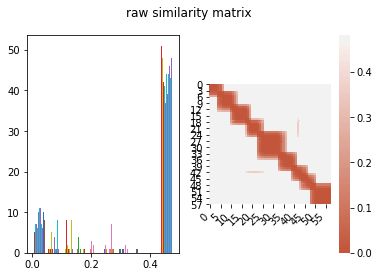

                 0
count  3364.000000
mean      0.390387
std       0.173934
min       0.000000
25%       0.480449
50%       0.480449
75%       0.480450
max       0.480450


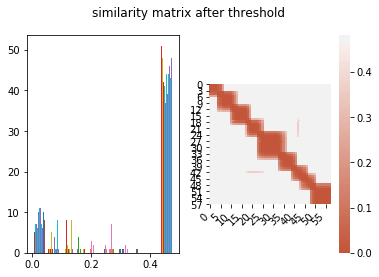

                  0
count  3.364000e+03
mean   3.976380e-01
std    1.686618e-01
min    2.938736e-39
25%    4.804487e-01
50%    4.804494e-01
75%    4.804495e-01
max    4.804503e-01


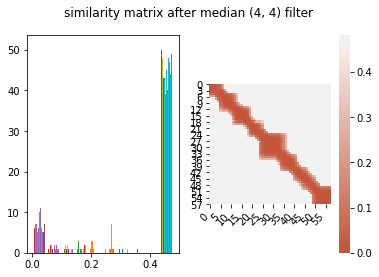

label 2 has done already cannot evaluate unsequentional segmentation, try other parameters
running the 1 experiment
video_id                                                    2mC1uqwEmWQ
window_size                                                         120
step_size                                                            20
vector_method                                                       lda
clustering_params                                                  None
vectorizing_params    {"alpha":1e-5,"eta":0.5e-2,'chunksize':60,'min...
similarity_method                                                cosine
is_min_thresh                                                      True
algorithm                                           spectral_clustering
n_clusters                                                           13
sim_thresh                                                          0.5
sim_filter                                             ['median',(4,4)]
accurrcy_shift      

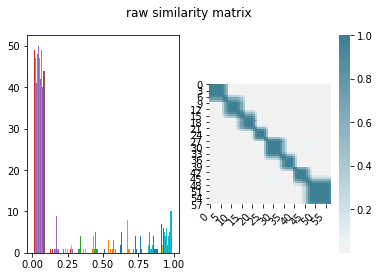

                 0
count  3364.000000
mean      0.145973
std       0.331642
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


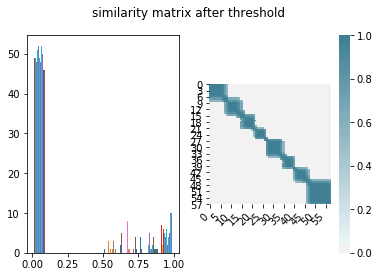

                 0
count  3364.000000
mean      0.157013
std       0.340038
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


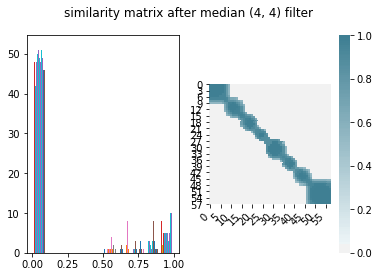

label 6 has done already cannot evaluate unsequentional segmentation, try other parameters
running the 2 experiment
video_id                                                    MkiUBJcgdUY
window_size                                                         150
step_size                                                            40
vector_method                                                       lda
clustering_params                                                  None
vectorizing_params    {"alpha":1e-5,"eta":0.5e-2,'chunksize':60,'min...
similarity_method                                        jensen_shannon
is_min_thresh                                                     False
algorithm                                           spectral_clustering
n_clusters                                                           18
sim_thresh                                                            1
sim_filter                                             ['median',(2,2)]
accurrcy_shift      

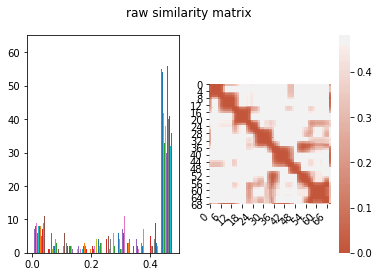

                 0
count  4761.000000
mean      0.368093
std       0.166530
min       0.000000
25%       0.286081
50%       0.480448
75%       0.480449
max       0.480450


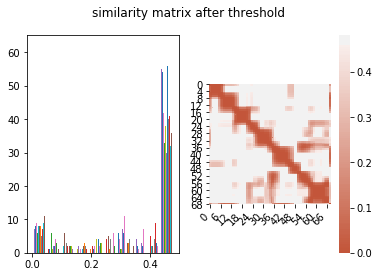

                 0
count  4761.000000
mean      0.386651
std       0.158237
min       0.000000
25%       0.337416
50%       0.480448
75%       0.480449
max       0.480450


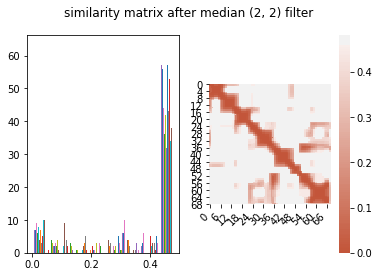

label 1 has done already cannot evaluate unsequentional segmentation, try other parameters
running the 3 experiment
video_id                                                    MkiUBJcgdUY
window_size                                                         150
step_size                                                            40
vector_method                                                       lda
clustering_params                                                  None
vectorizing_params    {"alpha":1e-5,"eta":0.5e-2,'chunksize':60,'min...
similarity_method                                                cosine
is_min_thresh                                                      True
algorithm                                           spectral_clustering
n_clusters                                                           18
sim_thresh                                                          0.4
sim_filter                                             ['median',(2,2)]
accurrcy_shift      

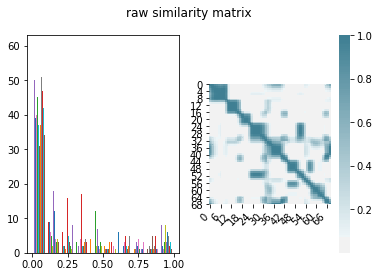

                 0
count  4761.000000
mean      0.157810
std       0.315736
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


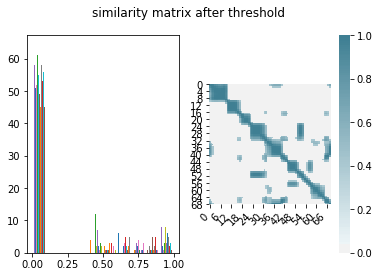

                 0
count  4761.000000
mean      0.183181
std       0.335078
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


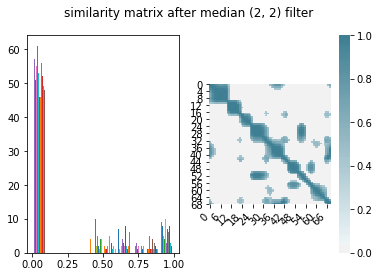

label 6 has done already cannot evaluate unsequentional segmentation, try other parameters
running the 4 experiment
video_id                                                    x5zLaWT5KPs
window_size                                                         150
step_size                                                            40
vector_method                                                       lda
clustering_params                                                  None
vectorizing_params    {"alpha":1e-5,"eta":0.5e-2,'chunksize':60,'min...
similarity_method                                        jensen_shannon
is_min_thresh                                                     False
algorithm                                           spectral_clustering
n_clusters                                                           14
sim_thresh                                                            1
sim_filter                                             ['median',(3,3)]
accurrcy_shift      

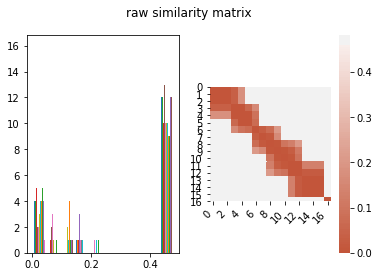

                0
count  289.000000
mean     0.340990
std      0.203236
min      0.000000
25%      0.115187
50%      0.480449
75%      0.480450
max      0.480451


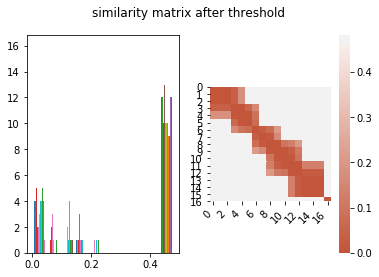

                0
count  289.000000
mean     0.341492
std      0.201965
min      0.000000
25%      0.098016
50%      0.480450
75%      0.480450
max      0.480451


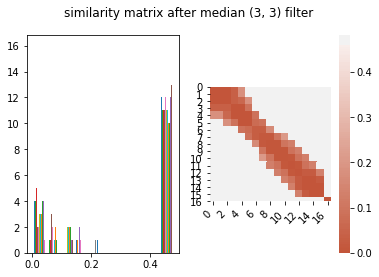

label 4 has done already cannot evaluate unsequentional segmentation, try other parameters
running the 5 experiment
video_id                                                    x5zLaWT5KPs
window_size                                                         150
step_size                                                            40
vector_method                                                       lda
clustering_params                                                  None
vectorizing_params    {"alpha":1e-5,"eta":0.5e-2,'chunksize':60,'min...
similarity_method                                                cosine
is_min_thresh                                                      True
algorithm                                           spectral_clustering
n_clusters                                                           14
sim_thresh                                                          0.4
sim_filter                                             ['median',(3,3)]
accurrcy_shift      

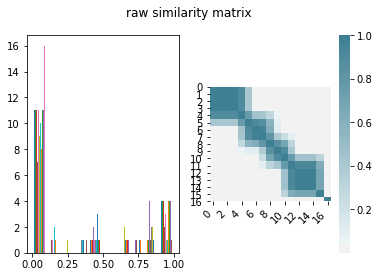

                0
count  289.000000
mean     0.274184
std      0.401275
min      0.000000
25%      0.000000
50%      0.000000
75%      0.688436
max      1.000000


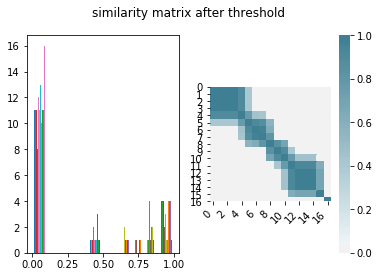

                0
count  289.000000
mean     0.269784
std      0.386563
min      0.000000
25%      0.000000
50%      0.000000
75%      0.631174
max      1.000000


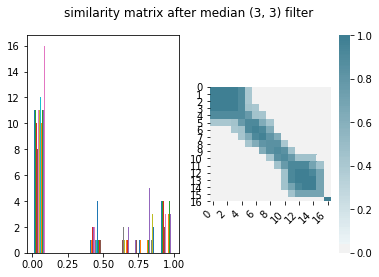

C:\Users\yaniv\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


label 1 has done already cannot evaluate unsequentional segmentation, try other parameters
running the 6 experiment
video_id                                                    zWg7U0OEAoE
window_size                                                         150
step_size                                                            40
vector_method                                                       lda
clustering_params                                                  None
vectorizing_params    {"alpha":1e-5,"eta":0.5e-2,'chunksize':60,'min...
similarity_method                                        jensen_shannon
is_min_thresh                                                     False
algorithm                                           spectral_clustering
n_clusters                                                           13
sim_thresh                                                            1
sim_filter                                             ['median',(3,3)]
accurrcy_shift      

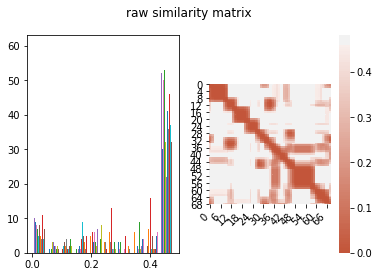

                 0
count  4761.000000
mean      0.355195
std       0.169433
min       0.000000
25%       0.227022
50%       0.480448
75%       0.480449
max       0.480451


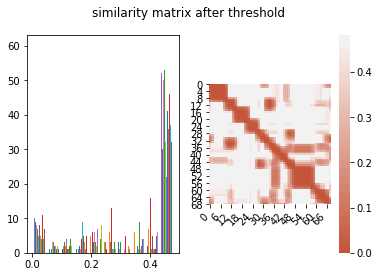

                 0
count  4761.000000
mean      0.356711
std       0.168481
min       0.000000
25%       0.227852
50%       0.480448
75%       0.480449
max       0.480451


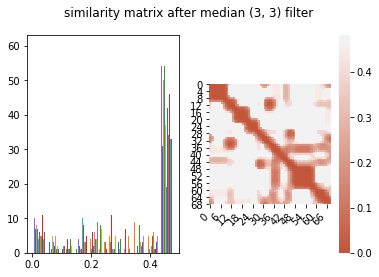

label 4 has done already cannot evaluate unsequentional segmentation, try other parameters
running the 7 experiment
video_id                                                    zWg7U0OEAoE
window_size                                                         150
step_size                                                            40
vector_method                                                       lda
clustering_params                                                  None
vectorizing_params    {"alpha":1e-5,"eta":0.5e-2,'chunksize':60,'min...
similarity_method                                                cosine
is_min_thresh                                                      True
algorithm                                           spectral_clustering
n_clusters                                                           13
sim_thresh                                                          0.4
sim_filter                                             ['median',(3,3)]
accurrcy_shift      

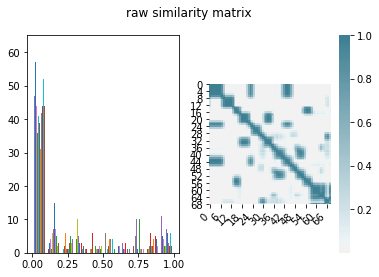

                 0
count  4761.000000
mean      0.149930
std       0.316894
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


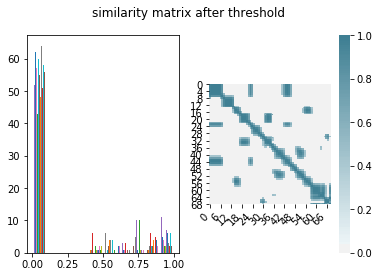

                 0
count  4761.000000
mean      0.141964
std       0.304896
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


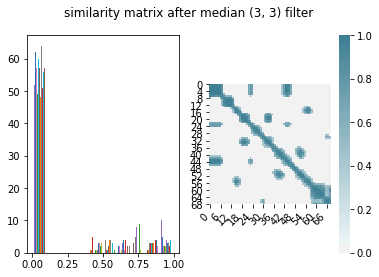

label 1 has done already cannot evaluate unsequentional segmentation, try other parameters
running the 8 experiment
video_id                                                    zWg7U0OEAoE
window_size                                                         150
step_size                                                            40
vector_method                                                       lda
clustering_params                                                  None
vectorizing_params    {"alpha":1e-5,"eta":0.5e-2,'chunksize':60,'min...
similarity_method                                        jensen_shannon
is_min_thresh                                                     False
algorithm                                           spectral_clustering
n_clusters                                                           13
sim_thresh                                                            1
sim_filter                                             ['median',(3,3)]
accurrcy_shift      

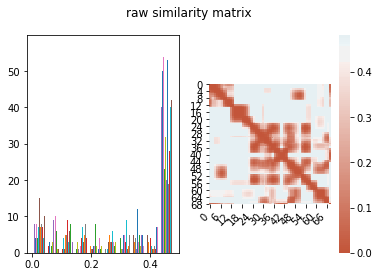

                 0
count  4761.000000
mean      0.337259
std       0.174774
min       0.000000
25%       0.171347
50%       0.441085
75%       0.480449
max       0.480451


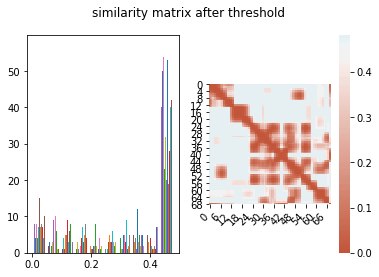

                 0
count  4761.000000
mean      0.338795
std       0.173016
min       0.000000
25%       0.171959
50%       0.442518
75%       0.480449
max       0.480451


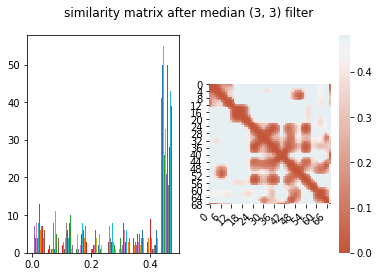

label 12 has done already cannot evaluate unsequentional segmentation, try other parameters
running the 9 experiment
video_id                                                    zWg7U0OEAoE
window_size                                                         150
step_size                                                            40
vector_method                                                       lda
clustering_params                                                  None
vectorizing_params    {"alpha":1e-5,"eta":0.5e-2,'chunksize':60,'min...
similarity_method                                                cosine
is_min_thresh                                                      True
algorithm                                           spectral_clustering
n_clusters                                                           13
sim_thresh                                                          0.4
sim_filter                                             ['median',(3,3)]
accurrcy_shift     

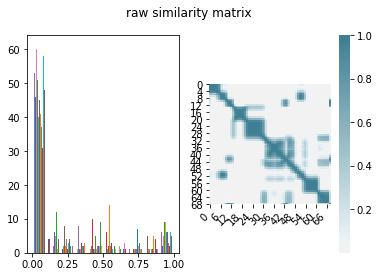

                 0
count  4761.000000
mean      0.148139
std       0.312435
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


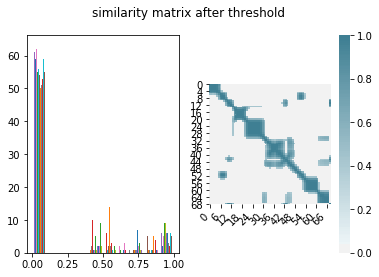

                 0
count  4761.000000
mean      0.142635
std       0.305036
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


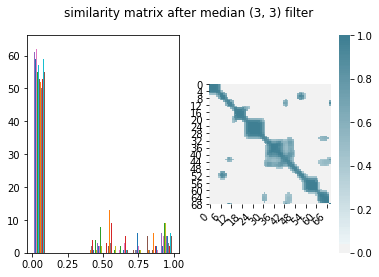

label 1 has done already cannot evaluate unsequentional segmentation, try other parameters
running the 10 experiment
video_id                                                    2mC1uqwEmWQ
window_size                                                         120
step_size                                                            20
vector_method                                                       lda
clustering_params                           {"eps":0.6,"min_samples":4}
vectorizing_params    {"alpha":1e-5,"eta":0.5e-2,'chunksize':60,'min...
similarity_method                                        jensen_shannon
is_min_thresh                                                     False
algorithm                                                        dbscan
n_clusters                                                           13
sim_thresh                                                            1
sim_filter                                             ['median',(4,4)]
accurrcy_shift     

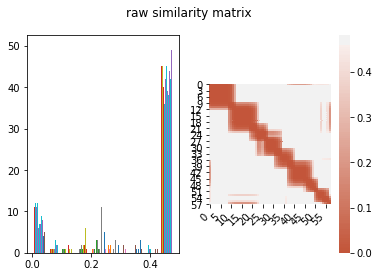

                 0
count  3364.000000
mean      0.372683
std       0.180850
min       0.000000
25%       0.277909
50%       0.480449
75%       0.480449
max       0.480450


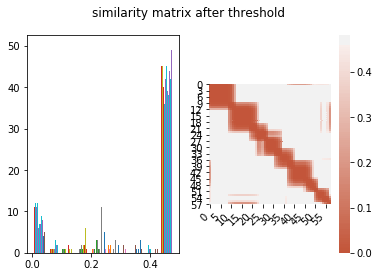

                  0
count  3.364000e+03
mean   3.827855e-01
std    1.776519e-01
min    4.701977e-38
25%    4.127031e-01
50%    4.804489e-01
75%    4.804495e-01
max    4.804503e-01


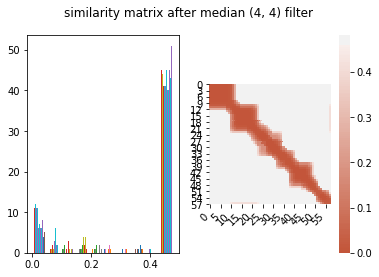

division by zero
running the 11 experiment
video_id                                                    2mC1uqwEmWQ
window_size                                                         120
step_size                                                            20
vector_method                                                       lda
clustering_params                                                  None
vectorizing_params    {"alpha":1e-5,"eta":0.5e-2,'chunksize':60,'min...
similarity_method                                                cosine
is_min_thresh                                                      True
algorithm                                           spectral_clustering
n_clusters                                                           13
sim_thresh                                                          0.5
sim_filter                                             ['median',(4,4)]
accurrcy_shift                                                       15
Name: 11, dtype: obje

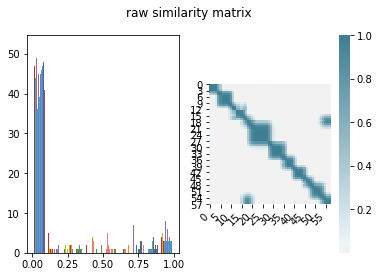

                 0
count  3364.000000
mean      0.121156
std       0.300339
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


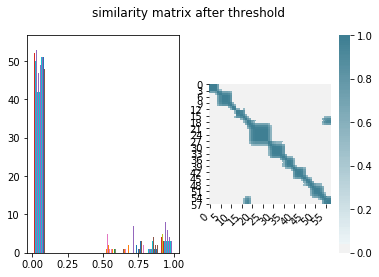

                 0
count  3364.000000
mean      0.127404
std       0.303797
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


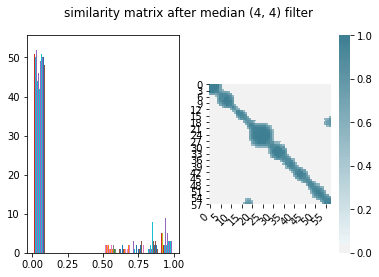

TP: 4 , FP: 11, FN: 9
precision rate : 0.26666666666666666, recall rate : 0.3076923076923077 
running the 12 experiment
video_id                                                    MkiUBJcgdUY
window_size                                                         150
step_size                                                            40
vector_method                                                       lda
clustering_params                           {"eps":0.6,"min_samples":4}
vectorizing_params    {"alpha":1e-5,"eta":0.5e-2,'chunksize':60,'min...
similarity_method                                        jensen_shannon
is_min_thresh                                                     False
algorithm                                                        dbscan
n_clusters                                                           18
sim_thresh                                                            1
sim_filter                                             ['median',(2,2)]
accurrcy_shift  

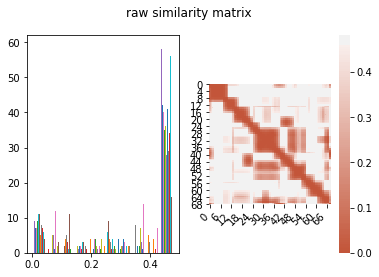

                 0
count  4761.000000
mean      0.356661
std       0.168217
min       0.000000
25%       0.251936
50%       0.480444
75%       0.480449
max       0.480450


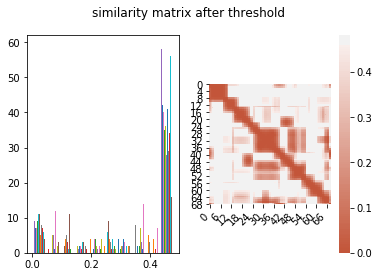

                 0
count  4761.000000
mean      0.376392
std       0.161474
min       0.000000
25%       0.305039
50%       0.480448
75%       0.480449
max       0.480450


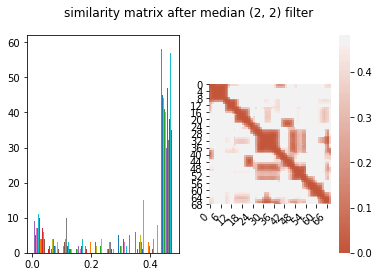

division by zero
running the 13 experiment
video_id                                                    MkiUBJcgdUY
window_size                                                         150
step_size                                                            40
vector_method                                                       lda
clustering_params                                                  None
vectorizing_params    {"alpha":1e-5,"eta":0.5e-2,'chunksize':60,'min...
similarity_method                                                cosine
is_min_thresh                                                      True
algorithm                                           spectral_clustering
n_clusters                                                           18
sim_thresh                                                          0.4
sim_filter                                             ['median',(2,2)]
accurrcy_shift                                                       15
Name: 13, dtype: obje

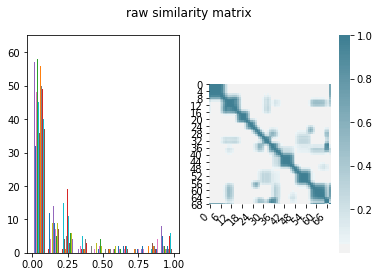

                 0
count  4761.000000
mean      0.115736
std       0.285780
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


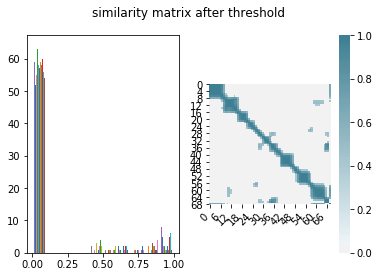

                 0
count  4761.000000
mean      0.133124
std       0.304718
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


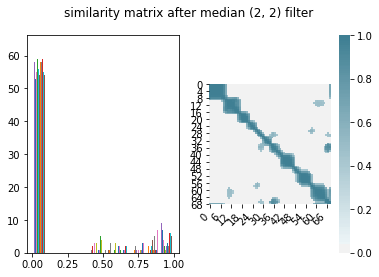

label 1 has done already cannot evaluate unsequentional segmentation, try other parameters
running the 14 experiment
video_id                                                    x5zLaWT5KPs
window_size                                                         150
step_size                                                            40
vector_method                                                       lda
clustering_params                           {"eps":0.6,"min_samples":4}
vectorizing_params    {"alpha":1e-5,"eta":0.5e-2,'chunksize':60,'min...
similarity_method                                        jensen_shannon
is_min_thresh                                                     False
algorithm                                                        dbscan
n_clusters                                                           14
sim_thresh                                                            1
sim_filter                                             ['median',(3,3)]
accurrcy_shift     

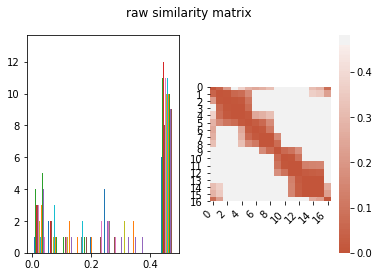

                0
count  289.000000
mean     0.329711
std      0.195632
min      0.000000
25%      0.113116
50%      0.480449
75%      0.480449
max      0.480451


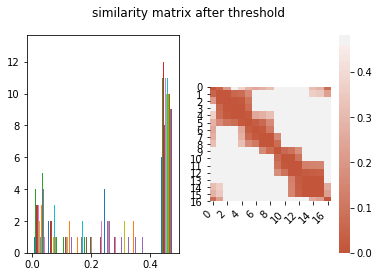

                0
count  289.000000
mean     0.329202
std      0.192565
min      0.000000
25%      0.113116
50%      0.480426
75%      0.480449
max      0.480450


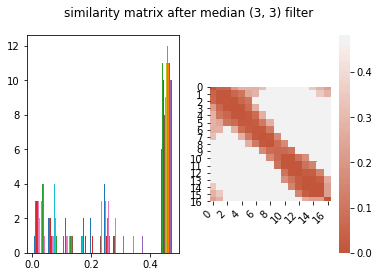

division by zero
running the 15 experiment
video_id                                                    x5zLaWT5KPs
window_size                                                         150
step_size                                                            40
vector_method                                                       lda
clustering_params                                                  None
vectorizing_params    {"alpha":1e-5,"eta":0.5e-2,'chunksize':60,'min...
similarity_method                                                cosine
is_min_thresh                                                      True
algorithm                                           spectral_clustering
n_clusters                                                           14
sim_thresh                                                          0.4
sim_filter                                             ['median',(3,3)]
accurrcy_shift                                                       15
Name: 15, dtype: obje

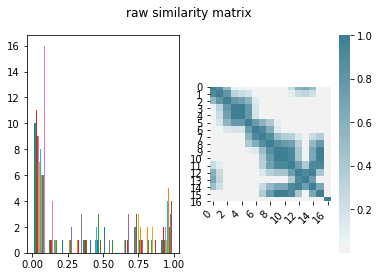

                0
count  289.000000
mean     0.264925
std      0.388183
min      0.000000
25%      0.000000
50%      0.000000
75%      0.672306
max      1.000000


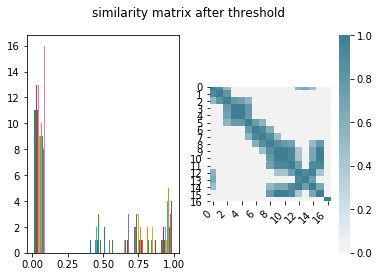

                0
count  289.000000
mean     0.248129
std      0.358574
min      0.000000
25%      0.000000
50%      0.000000
75%      0.624203
max      1.000000


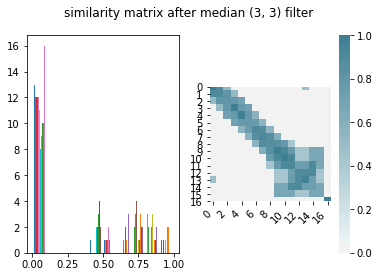

C:\Users\yaniv\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


label 6 has done already cannot evaluate unsequentional segmentation, try other parameters
running the 16 experiment
video_id                                                    zWg7U0OEAoE
window_size                                                         150
step_size                                                            40
vector_method                                                       lda
clustering_params                           {"eps":0.6,"min_samples":4}
vectorizing_params    {"alpha":1e-5,"eta":0.5e-2,'chunksize':60,'min...
similarity_method                                        jensen_shannon
is_min_thresh                                                     False
algorithm                                                        dbscan
n_clusters                                                           13
sim_thresh                                                            1
sim_filter                                             ['median',(3,3)]
accurrcy_shift     

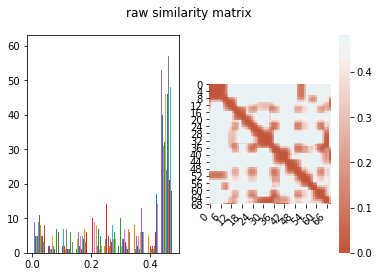

                 0
count  4761.000000
mean      0.348977
std       0.164229
min       0.000000
25%       0.232236
50%       0.447312
75%       0.480449
max       0.480451


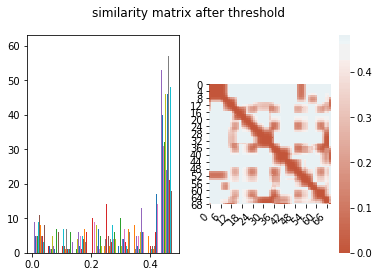

                 0
count  4761.000000
mean      0.350889
std       0.161489
min       0.000000
25%       0.238755
50%       0.441027
75%       0.480449
max       0.480451


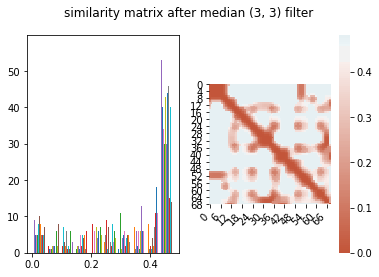

division by zero
running the 17 experiment
video_id                                                    zWg7U0OEAoE
window_size                                                         150
step_size                                                            40
vector_method                                                       lda
clustering_params                                                  None
vectorizing_params    {"alpha":1e-5,"eta":0.5e-2,'chunksize':60,'min...
similarity_method                                                cosine
is_min_thresh                                                      True
algorithm                                           spectral_clustering
n_clusters                                                           13
sim_thresh                                                          0.4
sim_filter                                             ['median',(3,3)]
accurrcy_shift                                                       15
Name: 17, dtype: obje

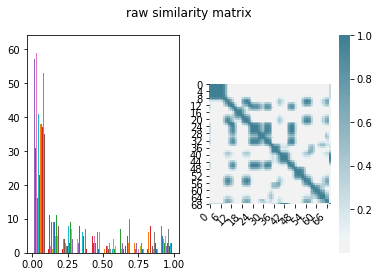

                 0
count  4761.000000
mean      0.170605
std       0.323825
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


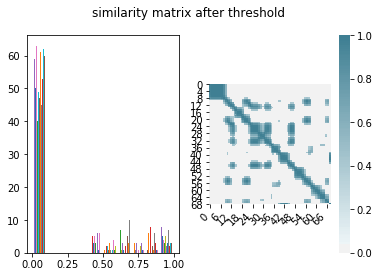

                 0
count  4761.000000
mean      0.158612
std       0.309550
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


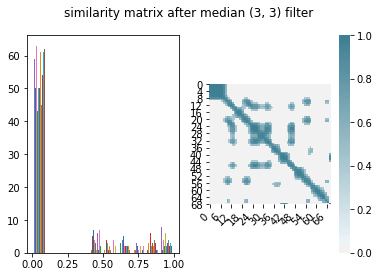

label 10 has done already cannot evaluate unsequentional segmentation, try other parameters
running the 18 experiment
video_id                                                    zWg7U0OEAoE
window_size                                                         150
step_size                                                            40
vector_method                                                       lda
clustering_params                           {"eps":0.6,"min_samples":4}
vectorizing_params    {"alpha":1e-5,"eta":0.5e-2,'chunksize':60,'min...
similarity_method                                        jensen_shannon
is_min_thresh                                                     False
algorithm                                                        dbscan
n_clusters                                                           13
sim_thresh                                                            1
sim_filter                                             ['median',(3,3)]
accurrcy_shift    

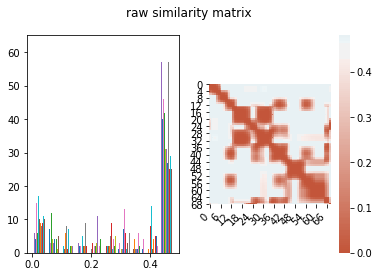

                 0
count  4761.000000
mean      0.330986
std       0.182257
min       0.000000
25%       0.161247
50%       0.448404
75%       0.480449
max       0.480451


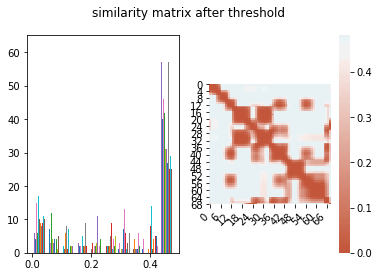

                 0
count  4761.000000
mean      0.331813
std       0.180624
min       0.000000
25%       0.163053
50%       0.443039
75%       0.480449
max       0.480451


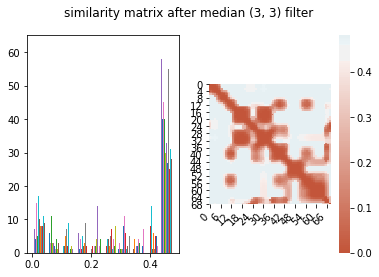

division by zero
running the 19 experiment
video_id                                                    zWg7U0OEAoE
window_size                                                         150
step_size                                                            40
vector_method                                                       lda
clustering_params                                                  None
vectorizing_params    {"alpha":1e-5,"eta":0.5e-2,'chunksize':60,'min...
similarity_method                                                cosine
is_min_thresh                                                      True
algorithm                                           spectral_clustering
n_clusters                                                           13
sim_thresh                                                          0.4
sim_filter                                             ['median',(3,3)]
accurrcy_shift                                                       15
Name: 19, dtype: obje

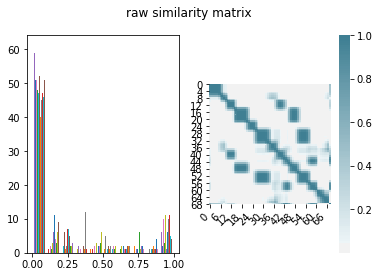

                 0
count  4761.000000
mean      0.151042
std       0.323583
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


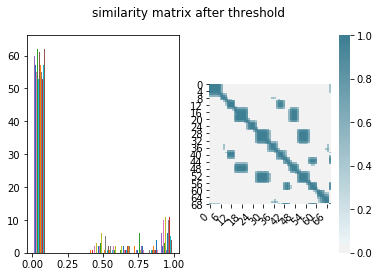

                 0
count  4761.000000
mean      0.139831
std       0.312340
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


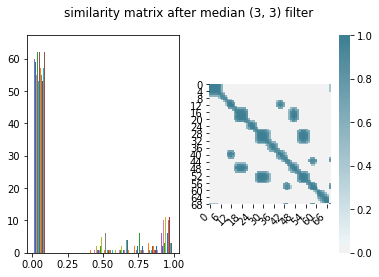

label 1 has done already cannot evaluate unsequentional segmentation, try other parameters


In [68]:
'''running the pipeline for each of the '''

for index,exp in df_exp.iterrows():
    #ground_base = df_videos.loc[df_videos['video id'] == exp['video_id'],'topic shifts(ends)'].values.tolist()[:-1]
    vid = exp['video_id']
    video_metadata = df_videos.loc[df_videos['video id'] == vid]
    # getting the topic shifts except the end of the video which is clearly at the length time 
    ground_base = video_metadata['topic shifts(ends)'].values.tolist()[:-1]
    video_len = video_metadata['length'].values.tolist()[0]
    curr_transcripts = transcripts_jsons[vid]    
    
    sim_filter = exp['sim_filter']
    if sim_filter is not None:
        sim_filter = ast.literal_eval(sim_filter)
    
    vectorizing_params = exp['vectorizing_params']
    if vectorizing_params is not None:
        vectorizing_params = ast.literal_eval(vectorizing_params)
    
    clustering_params = exp['clustering_params']
    if clustering_params is not None:
        clustering_params = ast.literal_eval(clustering_params)
    
    figure_path = os.path.join(results_path,str(index))
    os.mkdir(figure_path)
    
    print("running the %s experiment" %  (index))
    print(exp)
    
    
    df_results = pipeline.run(df_results,ground_base,vid,video_len,curr_transcripts,\
                              figure_path = figure_path,\
                              clustering_params = clustering_params,vectorizing_params=vectorizing_params,\
                             window_size = exp['window_size'], step_size = exp['step_size'],\
                             vector_method=exp['vector_method'],similarity_method= exp['similarity_method'],\
                             is_min_thresh=exp['is_min_thresh'],algorithm=exp['algorithm'],\
                             n_clusters=exp['n_clusters'],sim_thresh=exp['sim_thresh'],\
                             sim_filter=sim_filter,accurrcy_shift=exp['accurrcy_shift'])

In [69]:
headers = ['VIDEO','METHOD','ISFAILED',\
            'PRECISION','RECALL',\
            'TP','FP','FN','BLOCKSIZE','STEPSIZE',\
            'NUMOFCLUSTERSFORSC','NUMTOPICS','THERSHOLD',\
            'VECTORIZATIONPARAMS','CLUSTERINGPARAMS',\
            'FILTER','VIDEOLENGTH','ACCURECYSECONDS','FAILUREMESSAGE']

df_results[headers]

,VIDEO,METHOD,ISFAILED,PRECISION,RECALL,TP,FP,FN,BLOCKSIZE,STEPSIZE,NUMOFCLUSTERSFORSC,NUMTOPICS,THERSHOLD,VECTORIZATIONPARAMS,CLUSTERINGPARAMS,FILTER,VIDEOLENGTH,ACCURECYSECONDS,FAILUREMESSAGE
0,2mC1uqwEmWQ,chunking_lda_jensen_shannon_threshold_filter_s...,1.0,0.000000,0.000000,0.0,0.0,0.0,120.0,20.0,13.0,15.0,1.0,"{'alpha': 1e-05, 'eta': 0.005, 'chunksize': 60...",None,"['median', (4, 4)]",00:27:50,15.0,label 2 has done already cannot evaluate unseq...
1,2mC1uqwEmWQ,chunking_lda_cosine_threshold_filter_spectral_...,1.0,0.000000,0.000000,0.0,0.0,0.0,120.0,20.0,13.0,15.0,0.5,"{'alpha': 1e-05, 'eta': 0.005, 'chunksize': 60...",None,"['median', (4, 4)]",00:27:50,15.0,label 6 has done already cannot evaluate unseq...
2,MkiUBJcgdUY,chunking_lda_jensen_shannon_threshold_filter_s...,1.0,0.000000,0.000000,0.0,0.0,0.0,150.0,40.0,18.0,18.0,1.0,"{'alpha': 1e-05, 'eta': 0.005, 'chunksize': 60...",None,"['median', (2, 2)]",01:05:06,15.0,label 1 has done already cannot evaluate unseq...
3,MkiUBJcgdUY,chunking_lda_cosine_threshold_filter_spectral_...,1.0,0.000000,0.000000,0.0,0.0,0.0,150.0,40.0,18.0,18.0,0.4,"{'alpha': 1e-05, 'eta': 0.005, 'chunksize': 60...",None,"['median', (2, 2)]",01:05:06,15.0,label 6 has done already cannot evaluate unseq...
4,x5zLaWT5KPs,chunking_lda_jensen_shannon_threshold_filter_s...,1.0,0.000000,0.000000,0.0,0.0,0.0,150.0,40.0,14.0,14.0,1.0,"{'alpha': 1e-05, 'eta': 0.005, 'chunksize': 60...",None,"['median', (3, 3)]",00:17:37,15.0,label 4 has done already cannot evaluate unseq...
5,x5zLaWT5KPs,chunking_lda_cosine_threshold_filter_spectral_...,1.0,0.000000,0.000000,0.0,0.0,0.0,150.0,40.0,14.0,14.0,0.4,"{'alpha': 1e-05, 'eta': 0.005, 'chunksize': 60...",None,"['median', (3, 3)]",00:17:37,15.0,label 1 has done already cannot evaluate unseq...
6,zWg7U0OEAoE,chunking_lda_jensen_shannon_threshold_filter_s...,1.0,0.000000,0.000000,0.0,0.0,0.0,150.0,40.0,13.0,13.0,1.0,"{'alpha': 1e-05, 'eta': 0.005, 'chunksize': 60...",None,"['median', (3, 3)]",00:53:30,15.0,label 4 has done already cannot evaluate unseq...
7,zWg7U0OEAoE,chunking_lda_cosine_threshold_filter_spectral_...,1.0,0.000000,0.000000,0.0,0.0,0.0,150.0,40.0,13.0,13.0,0.4,"{'alpha': 1e-05, 'eta': 0.005, 'chunksize': 60...",None,"['median', (3, 3)]",00:53:30,15.0,label 1 has done already cannot evaluate unseq...
8,zWg7U0OEAoE,chunking_lda_jensen_shannon_threshold_filter_s...,1.0,0.000000,0.000000,0.0,0.0,0.0,150.0,40.0,13.0,13.0,1.0,"{'alpha': 1e-05, 'eta': 0.005, 'chunksize': 60...",None,"['median', (3, 3)]",00:53:30,15.0,label 12 has done already cannot evaluate unse...
9,zWg7U0OEAoE,chunking_lda_cosine_threshold_filter_spectral_...,1.0,0.000000,0.000000,0.0,0.0,0.0,150.0,40.0,13.0,13.0,0.4,"{'alpha': 1e-05, 'eta': 0.005, 'chunksize': 60...",None,"['median', (3, 3)]",00:53:30,15.0,label 1 has done already cannot evaluate unseq...


In [70]:
'''Save the results into file'''
df_results.to_csv(results_file_path,columns=headers)